In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
model = load_model("face_emotion_recognition.h5")
emotions = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

Enter the image path:  IMAGES/Emotion Detection/sad face.png


1/1 [==============================] - 1s 842ms/step


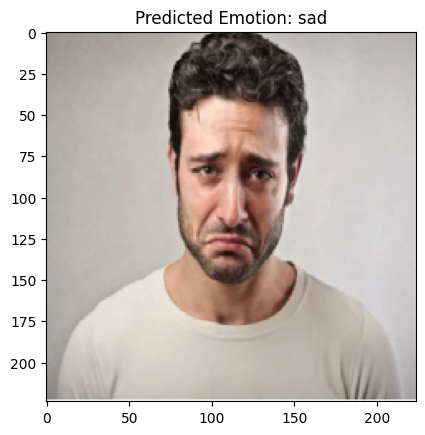

The predicted emotion is: sad


In [4]:
img_path = input("Enter the image path: ")
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Normalize pixel values to [0, 1]

# Make predictions
predictions = model.predict(img)

# Get the class label with the highest probability
emotion_label = np.argmax(predictions)

predicted_emotion = emotions[emotion_label]

# Display the image
plt.imshow(image.array_to_img(img[0]))
plt.title(f"Predicted Emotion: {predicted_emotion}")
plt.grid(False)
plt.show()

print(f"The predicted emotion is: {predicted_emotion}")

In [5]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open a video capture object (0 is typically the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Capture a frame from the camera
    ret, frame = cap.read()

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Crop the detected face region
        face = frame[y:y + h, x:x + w]

        # Preprocess the face
        img = cv2.resize(face, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        img = img / 255.0  # Normalize pixel values to [0, 1]
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Make predictions
        predictions = model.predict(img)
        emotion_label = np.argmax(predictions)
        predicted_emotion = emotions[emotion_label]

        # Draw a bounding box around the detected face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Overlay the predicted emotion text
        cv2.putText(frame, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the video frame with face detection and emotion prediction
    cv2.imshow('Emotion Detection', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close the OpenCV windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 56ms/step
